Environment && Library 

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"


import subprocess
with open(os.path.expanduser("~/successful NUMA node read from SysFS had negative value (-1)"), "r") as f:
    password = f.readline()
proc = subprocess.Popen(['sudo', '-S', 'sh', '-c', 'for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE,universal_newlines= True)
stdout, stderr = proc.communicate(input=password+'\n')
print(stdout)
print(stderr)

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

[sudo] password for user: 


Configuration

In [2]:
epochs = 10
augmentation = True
save_model = True
save_plot = True

Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28 ,28, 1).astype(np.float32) / 255.0, x_test.reshape(-1, 28 ,28, 1).astype(np.float32) / 255.0

if(augmentation == True):
    model_path = os.path.expanduser("~/Desktop/augmentation_functionAPI/")
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 30, width_shift_range= 0.2, height_shift_range= 0.2, zoom_range= 0.2, data_format= 'channels_last', dtype= np.float32)
elif(augmentation == False):
    model_path = os.path.expanduser("~/Desktop/Non_augmentation_functionAPI/")
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 0, width_shift_range= 0, height_shift_range= 0, zoom_range= 0, data_format= 'channels_last', dtype= np.float32)

train_gen.fit(x_train)
train_generator = train_gen.flow(x_train, y_train, batch_size=64, shuffle=True, seed=2, save_to_dir= None)
validation_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 30, width_shift_range= 0.2, height_shift_range= 0.2, zoom_range= 0.2, data_format= 'channels_last', dtype= np.float32)
validation_gen.fit(x_test)
validation_generator = validation_gen.flow(x_test, y_test, batch_size=64, shuffle=True, seed=2, save_to_dir= None)

Architecture

In [4]:
### layers ###
inputs = tf.keras.Input(shape=(28, 28, 1), name = "input")
C1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation="relu", name = "C1")
Flatten_1 = tf.keras.layers.Flatten(name = "Flatten_1")
S2 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name = "S2")
C3 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation="relu", name = "C3")
Flatten_2 = tf.keras.layers.Flatten(name = "Flatten_2")
S4 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name = "S4")
Flatten_3 = tf.keras.layers.Flatten(name = "Flatten_3")
F5 = tf.keras.layers.Dense(120, activation='relu', name = "F5")
F6 = tf.keras.layers.Dense(84, activation='relu', name = "F6")
exit_1 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_1")
exit_2 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_2")
exit_3 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_3")
exit_4 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_4")

### links ###
trunk = C1(inputs)      # input -> C1 
branch_1 = Flatten_1(trunk)
exit_1 = exit_1(branch_1)

trunk = S2(trunk)       # C1 -> S2
trunk = C3(trunk)       # S2 -> C3
branch_2 = Flatten_2(trunk)
exit_2 = exit_2(branch_2)

trunk = S4(trunk)       # C3 -> S4
trunk = Flatten_3(trunk)  # S4 -> Flatten
trunk = F5(trunk)       # Flatten -> F5
branch_3 = trunk
exit_3 = exit_3(branch_3)

trunk = F6(trunk)       # F5 -> F6
exit_4 = exit_4(trunk)

2023-07-22 19:34:29.168730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 19:34:29.480470: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3741 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Training

In [5]:
model = tf.keras.Model(inputs = inputs, outputs = [exit_1, exit_2, exit_3, exit_4])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, steps_per_epoch= 600, epochs= epochs, validation_data= validation_generator, validation_steps= 100)

Epoch 1/10


2023-07-22 19:34:30.904846: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-07-22 19:34:32.339023: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


600/600 [==============================] - 9s 11ms/step - loss: 5.0690 - exit_1_loss: 1.4767 - exit_2_loss: 1.2877 - exit_3_loss: 1.1726 - exit_4_loss: 1.1319 - exit_1_accuracy: 0.5128 - exit_2_accuracy: 0.5761 - exit_3_accuracy: 0.6163 - exit_4_accuracy: 0.6201 - val_loss: 3.2068 - val_exit_1_loss: 1.1125 - val_exit_2_loss: 0.8143 - val_exit_3_loss: 0.6686 - val_exit_4_loss: 0.6113 - val_exit_1_accuracy: 0.6603 - val_exit_2_accuracy: 0.7553 - val_exit_3_accuracy: 0.8003 - val_exit_4_accuracy: 0.8072
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 2.8057 - exit_1_loss: 1.0252 - exit_2_loss: 0.7102 - exit_3_loss: 0.5574 - exit_4_loss: 0.5129 - exit_1_accuracy: 0.6791 - exit_2_accuracy: 0.7876 - exit_3_accuracy: 0.8308 - exit_4_accuracy: 0.8389 - val_loss: 2.3747 - val_exit_1_loss: 0.9392 - val_exit_2_loss: 0.5928 - val_exit_3_loss: 0.4366 - val_exit_4_loss: 0.4062 - val_exit_1_accuracy: 0.7044 - val_exit_2_accuracy: 0.8130 - val_exit_3_accuracy: 0.8609 - val_e

Save Model

In [6]:
if(save_model == True):
    model.save(model_path, save_format= "tf")

INFO:tensorflow:Assets written to: ./augmentation_functionAPI/assets


INFO:tensorflow:Assets written to: ./augmentation_functionAPI/assets


Summary

In [7]:
model.summary()
print(model.dtype)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 C1 (Conv2D)                    (None, 24, 24, 6)    156         ['input[0][0]']                  
                                                                                                  
 S2 (AveragePooling2D)          (None, 12, 12, 6)    0           ['C1[0][0]']                     
                                                                                                  
 C3 (Conv2D)                    (None, 8, 8, 16)     2416        ['S2[0][0]']                     
                                                                                              

Chart

In [8]:
### architecture ###
if(save_plot == True):
    tf.keras.utils.plot_model(model, to_file= os.path.expanduser("~/Desktop/architecture.png"), show_shapes= True, show_layer_names= True, rankdir= "TB", dpi= 900, expand_nested= True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [9]:
epochs = np.arange(1, epochs + 1)

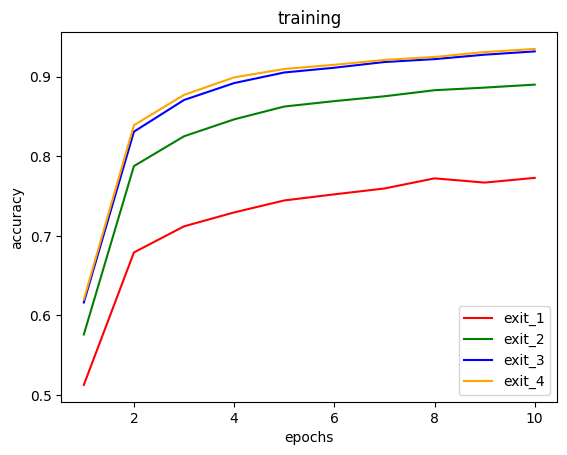

In [10]:
plt.figure()
plt.plot(epochs, history.history["exit_1_accuracy"], color= "red", marker= "", linestyle = "-", label= "exit_1")
plt.plot(epochs, history.history["exit_2_accuracy"], color= "green", marker= "", linestyle = "-", label= "exit_2")
plt.plot(epochs, history.history["exit_3_accuracy"], color= "blue", marker= "", linestyle = "-",  label= "exit_3")
plt.plot(epochs, history.history["exit_4_accuracy"], color= "orange", marker= "", linestyle = "-",  label= "exit_4")
plt.legend(loc = "lower right")
plt.title('training')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

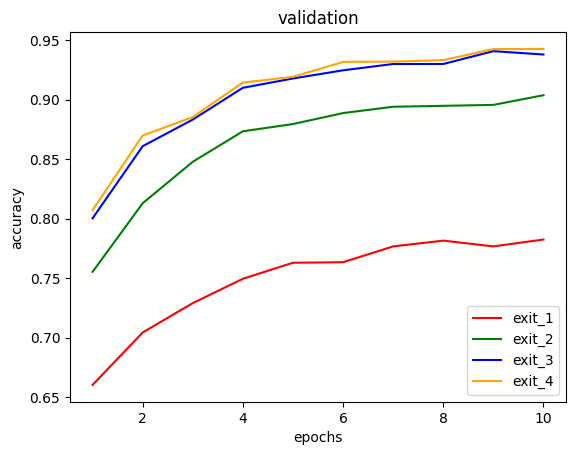

In [11]:
plt.figure()
plt.plot(epochs, history.history["val_exit_1_accuracy"], color= "red", marker= "", linestyle = "-", label= "exit_1")
plt.plot(epochs, history.history["val_exit_2_accuracy"], color= "green", marker= "", linestyle = "-", label= "exit_2")
plt.plot(epochs, history.history["val_exit_3_accuracy"], color= "blue", marker= "", linestyle = "-",  label= "exit_3")
plt.plot(epochs, history.history["val_exit_4_accuracy"], color= "orange", marker= "", linestyle = "-",  label= "exit_4")
plt.legend(loc = "lower right")
plt.title('validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')    
plt.show()